In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import numpy as np

Step 1: Read data out of the excel file.

        Date  Exchange rate
0 1996-10-09          42.45
1 1996-10-10          42.45
2 1996-10-11          42.45
3 1996-10-14          42.45
4 1996-10-15          42.45


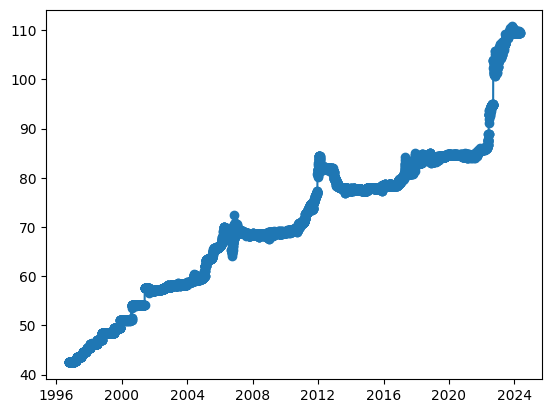

In [2]:

sheet_name='Sheet3'
data= pd.read_excel("F:/Thesis/Nazmul sir/DATA/bangladesh-inflation-rate-cpi.xlsx", sheet_name=sheet_name)
print(data.head())
plt.plot(data['Date'],data['Exchange rate'],'o-')
plt.show()


step 2: Data preparation

testing with lagged values

In [3]:
for i in range (1,8):
    data[f'Lag{i}']=data['Exchange rate'].shift(i)
data.dropna(inplace=True)
data['Day_of_Week'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
print(data.head())

         Date  Exchange rate   Lag1   Lag2   Lag3   Lag4   Lag5   Lag6   Lag7  \
7  1996-10-18          42.45  42.45  42.45  42.45  42.45  42.45  42.45  42.45   
8  1996-10-21          42.45  42.45  42.45  42.45  42.45  42.45  42.45  42.45   
9  1996-10-22          42.45  42.45  42.45  42.45  42.45  42.45  42.45  42.45   
10 1996-10-23          42.45  42.45  42.45  42.45  42.45  42.45  42.45  42.45   
11 1996-10-24          42.45  42.45  42.45  42.45  42.45  42.45  42.45  42.45   

    Day_of_Week  Month  Year  
7            18     10  1996  
8            21     10  1996  
9            22     10  1996  
10           23     10  1996  
11           24     10  1996  


test train split

In [4]:


x=data.drop(columns=['Date','Exchange rate','Year'])
y=data['Exchange rate']

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.8,random_state=42)

val_rmse=[]
val_r2=[]
kf=KFold(n_splits=100,shuffle=True,random_state=42)
for train_index, val_index in kf.split(x_train):
    x_train_cv,y_train_cv=x_train.iloc[train_index],y_train.iloc[train_index]
    x_val, y_val= x_train.iloc[val_index],y_train.iloc[val_index]
    
  
    model=LinearRegression()
    model.fit(x_train_cv, y_train_cv)
    y_pred = model.predict(x_val)
    rmse=mean_squared_error(y_pred,y_val,squared=False)
    val_rmse.append(rmse)
    r2=r2_score(y_val,y_pred)
    val_r2.append(r2)

print(f"average model rmse on 10 fold is {np.mean(val_rmse)}")
print(f"average model r2 score is {np.mean(val_r2)}")

final_model=LinearRegression()
final_model.fit(x_train,y_train)
prediction=final_model.predict(x_test)
RMSE=mean_squared_error(prediction,y_test,squared=False)
print (f'final model rmse is {RMSE}')

average model rmse on 10 fold is 0.27364519643279034
average model r2 score is 0.9995879740629706
final model rmse is 0.2462362094487382
